In [47]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [48]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [49]:
x = iris.data
y = iris.target

In [50]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(x,y)

DecisionTreeClassifier(max_depth=5)

Визуализация дерева

In [51]:
from sklearn.tree import export_graphviz
export_graphviz (
    decision_tree=model,
    out_file='/content/iris_tree.dot',
    feature_names=iris.feature_names,
    class_names=iris.target_names
)

In [52]:
!dot -Tpng /content/iris_tree.dot -o iris_tree.png

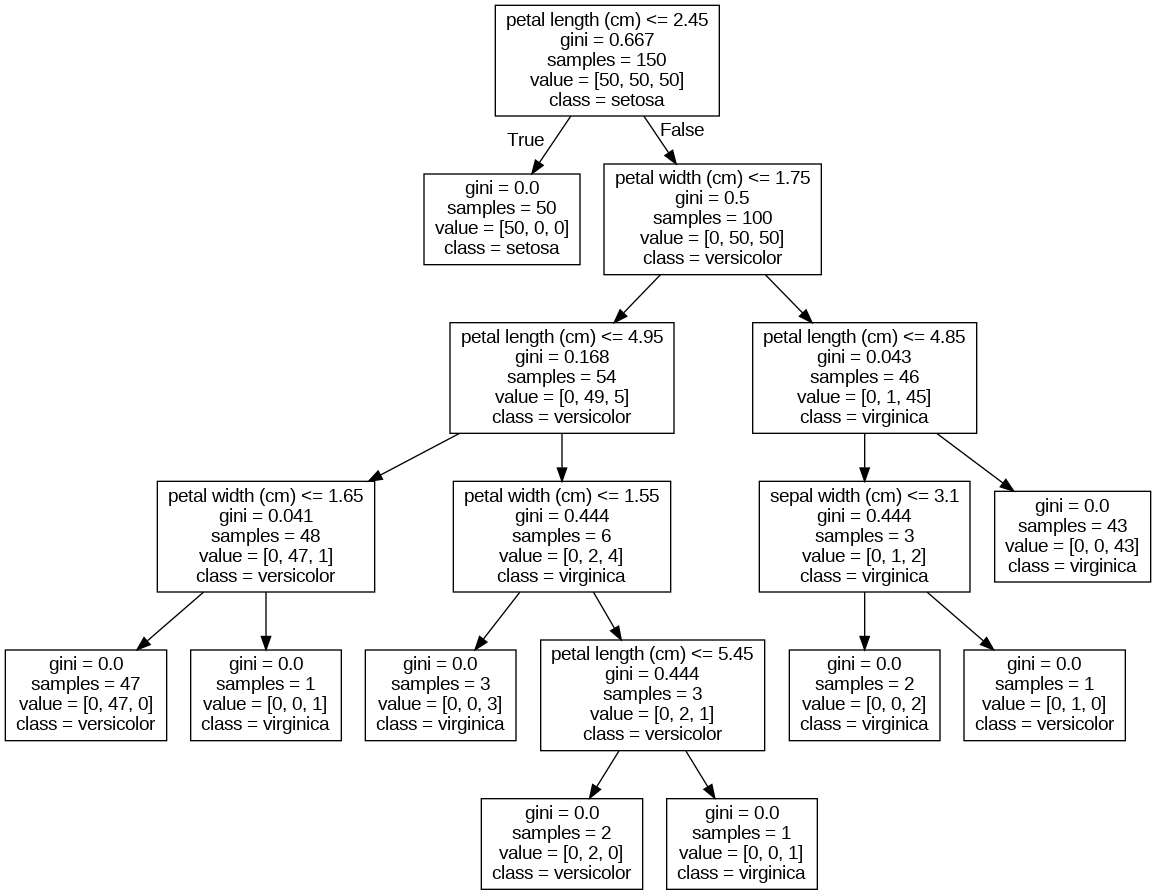

Где gini - загрязнённость Джини(если все обучающие образцы, к которым было применен, принадлежат одному классу -> gigni=0 и наоборот

value - показывет ко скольким обучающим образцам применяется этот узел

In [53]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit

In [54]:
x,y = make_moons(n_samples=10000,noise=0.4)

In [19]:
x

array([[ 1.15461913,  0.64862032],
       [-0.39992049,  0.58410556],
       [ 0.62285203, -1.0539425 ],
       ...,
       [ 0.51688523,  0.66101747],
       [ 0.59237028, -0.05249864],
       [ 1.66663768, -0.013452  ]])

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [56]:
dict_of_params = {
    'max_depth':[2,3,4,5,6],
    'criterion':['gini','entropy'],
    'max_leaf_nodes':[2,3,4],
}

In [57]:
model = DecisionTreeClassifier()
clf = GridSearchCV(model,dict_of_params)
clf.fit(x_train,y_train)
best_model = clf.best_estimator_
best_model

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4)

In [58]:
ready_model = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=4)
ready_model.fit(x_train,y_train)
pred = ready_model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.865

In [59]:
from sklearn.base import clone
forest = [clone(best_model) for _ in range(1000)]
rs = ShuffleSplit(n_splits=1000, test_size=len(x_train) - 100, random_state=42)
mini_sets=[]
for train_ind,test_ind in rs.split(x_train):
    X_mini_train = x_train[train_ind]
    y_mini_train = y_train[train_ind]
    mini_sets.append((X_mini_train, y_mini_train))

In [61]:
import numpy as np
accuracy_scores = []
for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    y_pred = tree.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
np.mean(accuracy_scores)

0.8287370000000001

In [63]:
from scipy.stats import mode
y_preds = np.empty([1000,len(x_test)],dtype=np.uint8)
for tree_ind,tree in enumerate(forest):
  y_preds[tree_ind] = tree.predict(x_test)
y_major,n_votes = mode(y_preds,axis=0)

In [64]:
accuracy_score(y_test,y_major.reshape([-1]))

0.8685